## Mobile Price Classification
**By: `Suraj Honkamble`**

### Import required libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

### Load and Read train data

In [9]:
pd.options.display.max_columns=50

In [10]:
train=pd.read_csv('D:\DATA SCIENCE Internship with CodersCave\Data\mobile_price\\train.csv')
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


### Understand the data
- battery_power    -   Total energy a battery can store in one time measured in mAh
- blue             -   Has bluetooth or not
- clock_speed      -   Speed at which microprocessor executes instructions
- dual_sim         -   Has dual sim support or not
- fc               -   Front Camera mega pixels
- four_g           -   Has 4G or not
- int_memory       -   Internal Memory in Gigabytes
- m_dep            -   Mobile Depth in cm
- mobile_wt        -   Weight of mobile phone
- n_cores          -   Number of cores of processor
- pc               -   Primary Camera mega pixels
- px_height        -   Pixel Resolution Height
- px_width         -   Pixel Resolution Width
- ram              -   Random Access Memory in Megabytes
- sc_h             -   Screen Height of mobile in cm
- sc_w             -   Screen Width of mobile in cm
- talk_time        -   Longest time that a single battery charge will last when you are on call
- three_g          -   Has 3G or not
- touch_screen     -   Has touch screen or not
- wifi             -   Has wifi or not
- price_range      -   Range of mobile price

In [6]:
train.shape

(2000, 21)

In [7]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### Missing Values

In [12]:
train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### No missing values in dataset.

### Analyze Price Range (target variable)

In [13]:
train['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

In [14]:
train['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

#### Each Class in Price Range has equal number of rows.

## Exploratory Data Analysis

### Analyse Battery Power column
- Battery power in Mili Ampere Hours(mAh)

In [60]:
print("Maximum Battery Power Mobile", train['battery_power'].max())
print("Minimum Battery Power Mobile", train['battery_power'].min())
print("Average Battery Power Mobile", train['battery_power'].mean())

Maximum Battery Power Mobile 1998
Minimum Battery Power Mobile 501
Average Battery Power Mobile 1238.5185


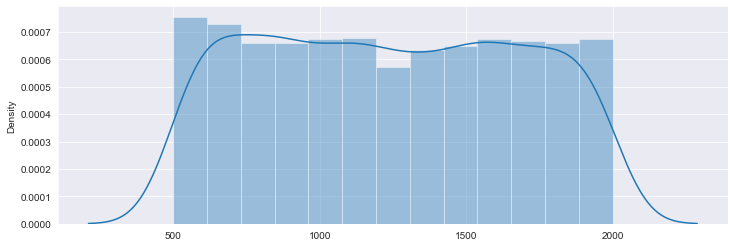

In [25]:
plt.figure(figsize=(12,4))
sns.distplot(x=train['battery_power']);

1. **Maximum Battery power is `1998mAh` and Minimum Battery power is `501mAh`.**
2. **Average Battery power for mobiles is `1238mAh`.**
3. **For Every battery power we have almost equal number of rows.**

### Analyze Bluetooth column
- If mobile has bluetooth then blue=1, else blue=0

In [26]:
train['blue'].unique()

array([0, 1], dtype=int64)

In [27]:
train['blue'].value_counts()

0    1010
1     990
Name: blue, dtype: int64

<AxesSubplot:>

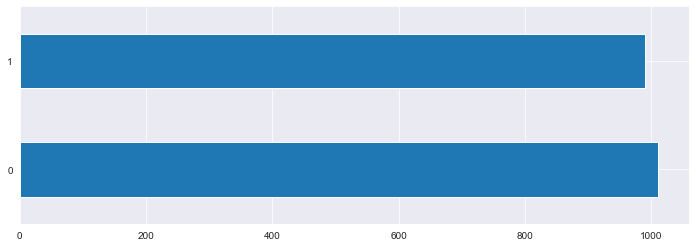

In [29]:
train['blue'].value_counts().plot(kind='barh', figsize=(12,4))

**1010 mobile dont have bluetooth and 990 mobiles has bluetooth support.**

### Analyze Clock Speed column
- Speed at which microprocessor executes instructions in GigaHertz

In [30]:
train['clock_speed'].nunique()

26

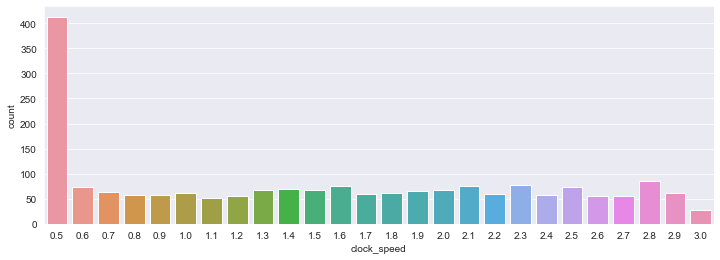

In [33]:
plt.figure(figsize=(12,4))
sns.countplot(x=train['clock_speed']);

1. **Minimum Clocl speed is `o.5Gihahertz` and Maximum Clock speed is `3Gigahertz`.**
2. **`Higher` the Close speed, `Greater` the performance.**
3. **Most of the mobiles in this dataset has `0.5Gihahertz` clock speed.**

### Analyze Dual Sim column
- Mobile has dual sim support or not, 1 for support dual sim and 0 for not support.

In [34]:
train['dual_sim'].unique()

array([0, 1], dtype=int64)

In [35]:
train['dual_sim'].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

<AxesSubplot:>

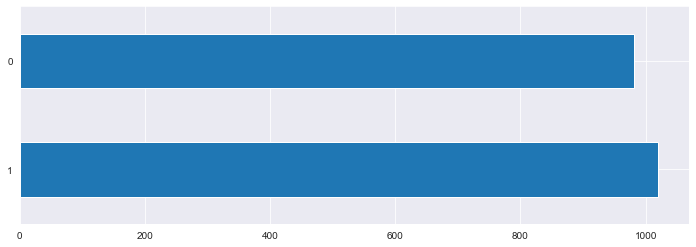

In [36]:
train['dual_sim'].value_counts().plot(kind='barh', figsize=(12,4))

**1019 Mobiles supports dual sim and 981 mobile supports single sim.**

### Analyze Front Camera pixels column

In [38]:
train['fc'].unique()

array([ 1,  0,  2, 13,  3,  4,  5,  7, 11, 12, 16,  6, 15,  8,  9, 10, 18,
       17, 14, 19], dtype=int64)

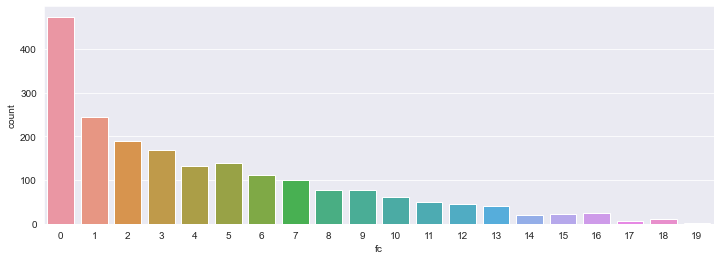

In [39]:
plt.figure(figsize=(12,4))
sns.countplot(x=train['fc']);

1. **Most of the mobile has Front camera pixel as 0, from this we can conclude that these Mobiles has no fron camera.**
2. **Maximum Front camera pixel is `19 Pixels`.**

### Analyze Four G column
- Handset has 4G or not

In [41]:
train['four_g'].unique()

array([0, 1], dtype=int64)

In [43]:
train['four_g'].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

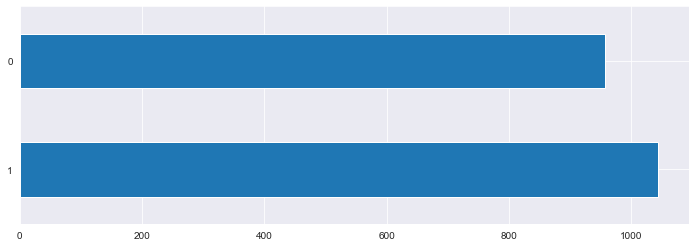

In [42]:
train['four_g'].value_counts().plot(kind='barh', figsize=(12,4));

**1043 Mobile handset support 4G network, and 957 Mobile does not support 4G network**

### Analyze Internal Memory column
- Internal Memory in Gigabytes

In [45]:
train['int_memory'].unique()

array([ 7, 53, 41, 10, 44, 22, 24,  9, 33, 17, 52, 46, 13, 23, 49, 19, 39,
       47, 38,  8, 57, 51, 21,  5, 60, 61,  6, 11, 50, 34, 20, 27, 42, 40,
       64, 14, 63, 43, 16, 48, 12, 55, 36, 30, 45, 29, 58, 25,  3, 54, 15,
       37, 31, 32,  4, 18,  2, 56, 26, 35, 59, 28, 62], dtype=int64)

In [52]:
print("Maximum Internal Memory", train['int_memory'].max(),"GB")
print("Minimum Internal Memory", train['int_memory'].min(),"GB")

Maximum Internal Memory 64 GB
Minimum Internal Memory 2 GB


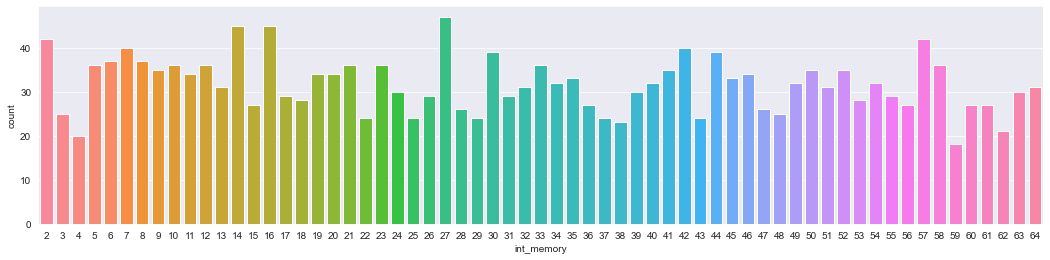

In [50]:
plt.figure(figsize=(18,4))
sns.countplot(x=train['int_memory'], saturation=1);

1. **Mimimum Internal Memory is `2GB` and Maximum Internal Memory is `64GB`.**
2. **Every Mobile in this dataset has internal memory above `20GB`.**

### Analyze Mobile depth column
- Mobile Depth in cm

In [55]:
train['m_dep'].unique()

array([0.6, 0.7, 0.9, 0.8, 0.1, 0.5, 1. , 0.3, 0.4, 0.2])

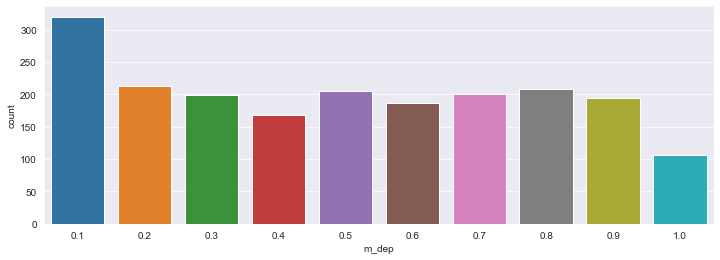

In [58]:
plt.figure(figsize=(12,4))
sns.countplot(x=train['m_dep']);

1. **Maximum mobile depth is `1CM` and Mimimum mobile depth is `0.1CM`.**
2. **Most of the mobiles have Depth `0.1CM`.**

### Analyze Mobile weight column
- Weight in Grams

In [59]:
print(train['mobile_wt'].

121

In [61]:
print("Maximum Mobile weight", train['mobile_wt'].max(),"Grams")
print("Minimum Mobile weight", train['mobile_wt'].min(),"Grams")
print("Average Mobile weight", train['mobile_wt'].mean(),"Grams")

Maximum Mobile weight 200 Grams
Minimum Mobile weight 80 Grams
Average Mobile weight 140.249 Grams


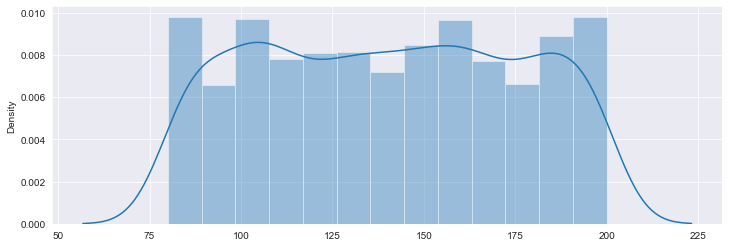

In [63]:
plt.figure(figsize=(12,4))
sns.distplot(x=train['mobile_wt']);

1. **Maximum Mobile weight is is `200 Grams`, Minimum Mobile weight is `80 Grams` and Average mobile weight is `140 Grams`.**
2. **For every mobile weight categpry contains almost equal rows.**

### Analayze Number of Core column
- Number of cores of processor

In [64]:
train['n_cores'].unique()

array([2, 3, 5, 6, 1, 8, 4, 7], dtype=int64)

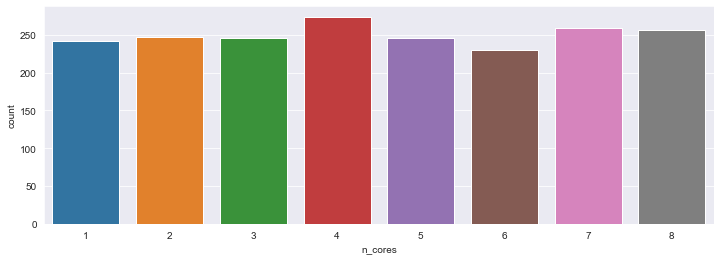

In [66]:
plt.figure(figsize=(12,4))
sns.countplot(x=train['n_cores']);

1. **Maximum Processor Cores are `8` and minimum Processor Cores are `1`.**
2. **Most of the mobile have `4` Processor Cores.** 

### Analyze Primary Camera column

In [67]:
train['pc'].unique()

array([ 2,  6,  9, 14,  7, 10,  0, 15,  1, 18, 17, 11, 16,  4, 20, 13,  3,
       19,  8,  5, 12], dtype=int64)

In [71]:
print("Mimimum Primary Camera Pixels", train['pc'].min())
print("Maximum Primary Camera Pixels", train['pc'].max())

Mimimum Primary Camera Pixels 0
Maximum Primary Camera Pixels 20


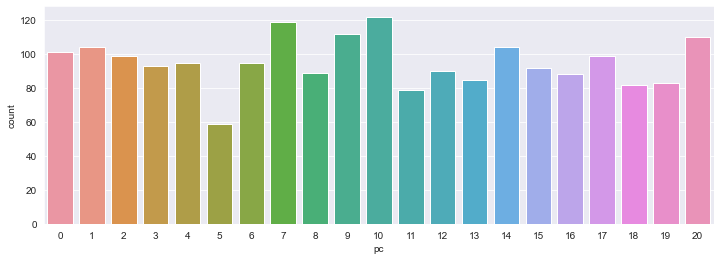

In [70]:
plt.figure(figsize=(12,4))
sns.countplot(x=train['pc']);

**Minimum Primary Camera Pixel is `20 Pixels`, Minimum os `0 Pixels`, this means the Mobile phones with Primary camera pixel=0 has no Primary Camera.**

### Analyze Pixel Resolution height column

In [74]:
train['px_height'].nunique()

1137

In [75]:
print("Maximum Pixel Resolution height", train['px_height'].max())
print("Minimum Pixel Resolution height", train['px_height'].min())

Maximum Pixel Resolution height 1960
Minimum Pixel Resolution height 0


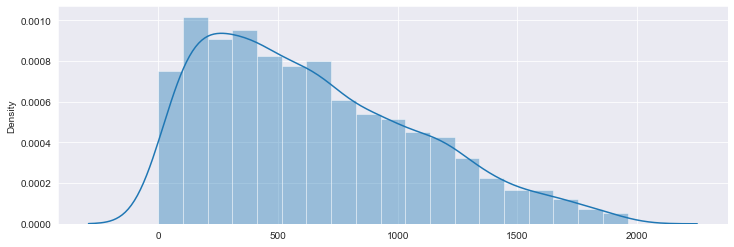

In [78]:
plt.figure(figsize=(12,4))
sns.distplot(x=train['px_height']);

1. **Maximum Pixel Resolution height is `1960` and minimum is `0`.**
2. **Data is right skewed, Most of the mobiles have Pixel Resolution height from `0 to 700`.**

### Analyze Pixel Resolution width column

In [77]:
train['px_width'].nunique()

1109

In [76]:
print("Maximum Pixel Resolution width", train['px_width'].max())
print("Minimum Pixel Resolution height", train['px_width'].min())

Maximum Pixel Resolution width 1998
Minimum Pixel Resolution height 500


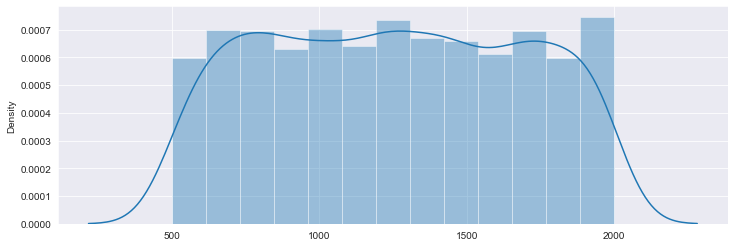

In [79]:
plt.figure(figsize=(12,4))
sns.distplot(x=train['px_width']);

1. **Maximum Pixel Resolution width is `1998`, and minimum is `500`.**
2. **Almost every pixel resolutions have equal number of rows in this dataset.**

### Analyze RAM column
- RAM in MB

In [83]:
print("Maximum RAM size", train['ram'].max())
print("Minimum RAM size", train['ram'].min())

Maximum RAM size 3998
Minimum RAM size 256


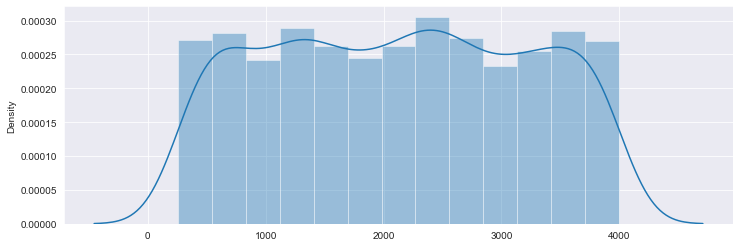

In [84]:
plt.figure(figsize=(12,4))
sns.distplot(x=train['ram']);

1. **Maximum RAM size is `3.98GB` and minimum RAM size is `256MB`.
2. **Peack is Flatten so we can say that every RAM size in this dataset has almost equal number of rows.**

### Analyze Screen height column
- Screen height in CM

In [86]:
print("Maximum Screen height", train['sc_h'].max(),"cm")
print("Minimum Screen height", train['sc_h'].min(),'cm')

Maximum Screen height 19 cm
Minimum Screen height 5 cm


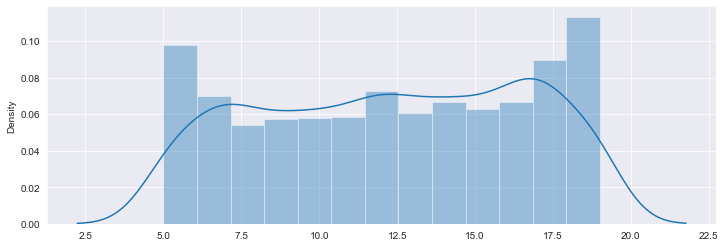

In [88]:
plt.figure(figsize=(12,4))
sns.distplot(x=train['sc_h']);

**Most number mobile has screen height 5cm and 19cm.**

### Analyze Screen width column
- Screen width in CM

In [87]:
print("Maximum Screen height", train['sc_w'].max(),"cm")
print("Minimum Screen height", train['sc_w'].min(),'cm')

Maximum Screen height 18 cm
Minimum Screen height 0 cm


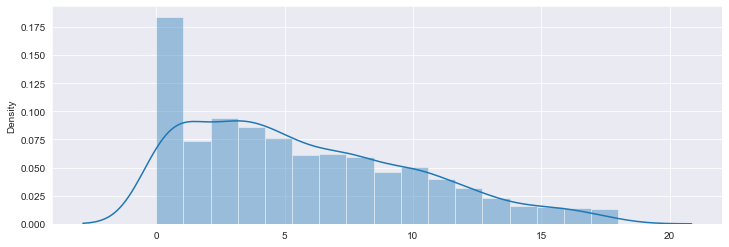

In [89]:
plt.figure(figsize=(12,4))
sns.distplot(x=train['sc_w']);

**Most of the Mobile has Screen height 0 cm.**

### Analyze Talk time column
-  Longest time in Hours that a single battery charge will last when you are on call.

In [90]:
train['talk_time'].unique()

array([19,  7,  9, 11, 15, 10, 18,  5, 20, 12, 13,  2,  4,  3, 16,  6, 14,
       17,  8], dtype=int64)

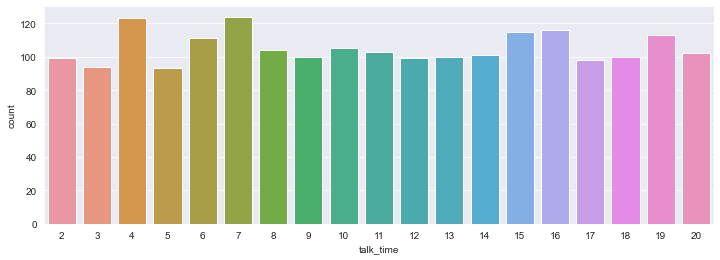

In [96]:
plt.figure(figsize=(12,4))
sns.countplot(x=train['talk_time']);

**Minimum hour that can be spent on call after 1 full charge is 2 hour and maximum is 20 hours.**

### Analyze Three G columns
- Whether handset supports 3G network or not

In [97]:
train['three_g'].unique()

array([0, 1], dtype=int64)

In [98]:
train['three_g'].value_counts()

1    1523
0     477
Name: three_g, dtype: int64

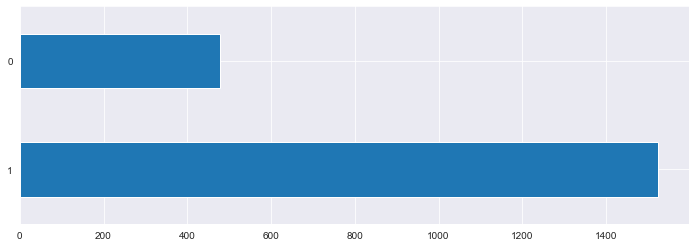

In [99]:
train['three_g'].value_counts().plot(kind='barh', figsize=(12,4));

**Almost 80% Mobiles support 3G network.**

### Analyze Touch screen column

In [104]:
train['touch_screen'].value_counts()

1    1006
0     994
Name: touch_screen, dtype: int64

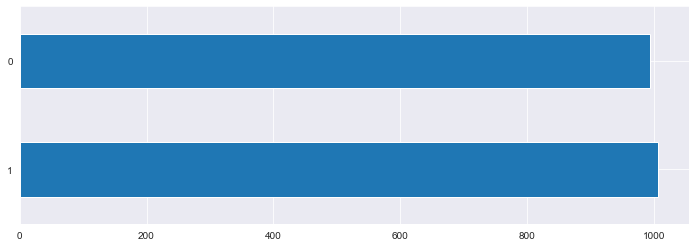

In [103]:
train['touch_screen'].value_counts().plot(kind='barh', figsize=(12,4));

### Analyze Wi-Fi column

In [101]:
train['wifi'].value_counts()

1    1014
0     986
Name: wifi, dtype: int64

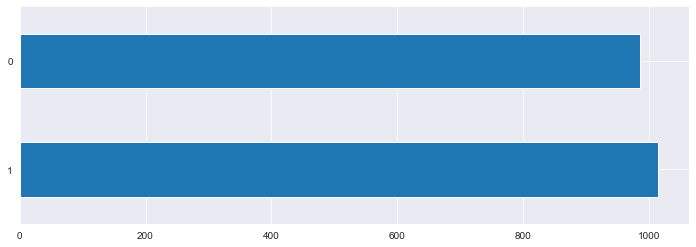

In [102]:
train['wifi'].value_counts().plot(kind='barh', figsize=(12,4));

## Feature Engineering

#### Here there are 20 Input features. We are selecting only those features which are highly correlated to Output variable. There are many methods to select the important features,
1. Univariate Selection using SelectKBest
2. Feature Importance using ExtraTreesClassifier
3. Correlation Method.

#### 1. Univariate Selection using SelectKBest

In [119]:
from sklearn.feature_selection import SelectKBest
X=train.drop('price_range', axis=1)
y=train['price_range']
bestfeatures=SelectKBest()
fit=bestfeatures.fit(X,y)
scores=pd.DataFrame(fit.scores_)
scores.index=X.columns
scores.reset_index(inplace=True)
scores.columns=['Features','Score']
scores

,Features,Score
0,battery_power,31.598158
1,blue,0.476768
2,clock_speed,0.493708
3,dual_sim,0.428239
4,fc,0.772182
5,four_g,1.059525
6,int_memory,2.922996
7,m_dep,1.500682
8,mobile_wt,3.594318
9,n_cores,2.625415


**Sort these values and select top 10 features only.**

In [122]:
selected=scores.groupby('Features').Score.sum().sort_values(ascending=False)[:10]
selected

Features
ram              3520.110824
battery_power      31.598158
px_width           22.620882
px_height          19.484842
mobile_wt           3.594318
int_memory          2.922996
n_cores             2.625415
sc_h                2.225984
sc_w                1.671000
talk_time           1.628811
Name: Score, dtype: float64

**`'ram', 'battery_power', 'px_width', 'px_height', 'mobile_wt', 'int_memory', 'n_cores', 'sc_h', 'sc_w', 'talk_time'` These are top 10 selected columns.**

#### 2. Feature Importance using ExtraTreesClassifier

In [131]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)
scores=pd.DataFrame(model.feature_importances_,index=X.columns)
scores.reset_index(inplace=True)
scores.columns=['Features','Score']
scores

,Features,Score
0,battery_power,0.060667
1,blue,0.020777
2,clock_speed,0.034372
3,dual_sim,0.019953
4,fc,0.033571
5,four_g,0.017142
6,int_memory,0.035397
7,m_dep,0.034880
8,mobile_wt,0.036970
9,n_cores,0.033457


**Select only top 10.**

In [132]:
selected=scores.groupby('Features').Score.sum().sort_values(ascending=False)[:10]
selected

Features
ram              0.383636
battery_power    0.060667
px_width         0.048653
px_height        0.047924
mobile_wt        0.036970
talk_time        0.036387
int_memory       0.035397
sc_w             0.035098
m_dep            0.034880
clock_speed      0.034372
Name: Score, dtype: float64

In [133]:
selected.index

Index(['ram', 'battery_power', 'px_width', 'px_height', 'mobile_wt',
       'talk_time', 'int_memory', 'sc_w', 'm_dep', 'clock_speed'],
      dtype='object', name='Features')

**`'ram', 'battery_power', 'px_width', 'px_height', 'mobile_wt', 'talk_time', 'int_memory', 'sc_w', 'm_dep', 'clock_speed'` These are the selected input features.**

#### 3. Correlation Method

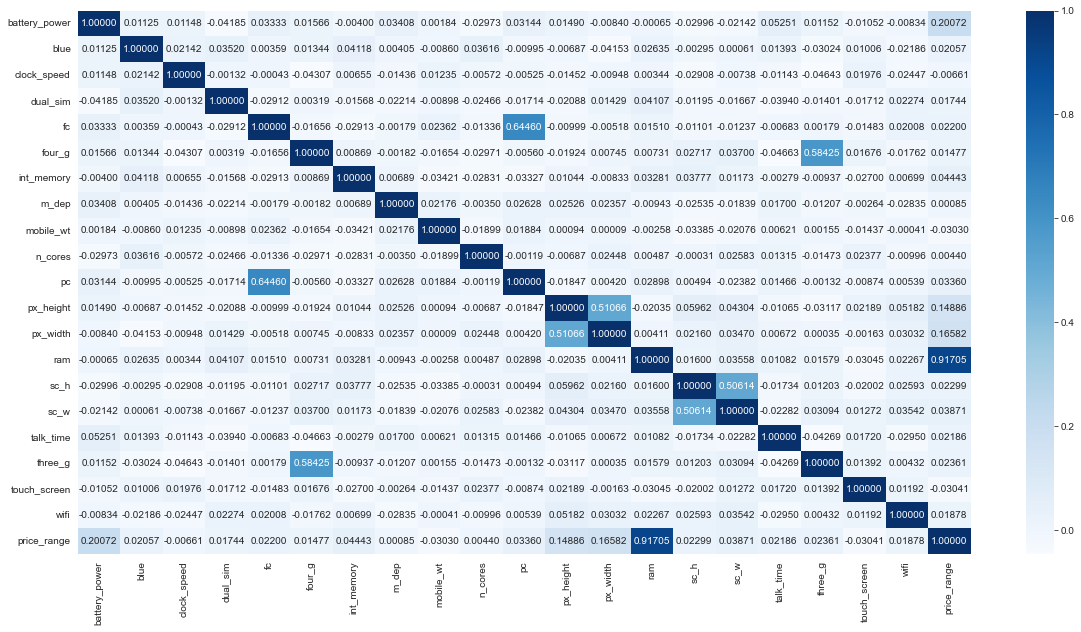

In [144]:
correlation=train.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True, cmap='Blues',fmt='.5f');

**Select top 10 features**

In [153]:
corr_to_price_range=pd.DataFrame(correlation['price_range'])
corr_to_price_range.reset_index(inplace=True)
corr_to_price_range.columns=['Features','Score']
corr_to_price_range['abs_score']=abs(corr_to_price_range['Score'])
corr_to_price_range

,Features,Score,abs_score
0,battery_power,0.200723,0.200723
1,blue,0.020573,0.020573
2,clock_speed,-0.006606,0.006606
3,dual_sim,0.017444,0.017444
4,fc,0.021998,0.021998
5,four_g,0.014772,0.014772
6,int_memory,0.044435,0.044435
7,m_dep,0.000853,0.000853
8,mobile_wt,-0.030302,0.030302
9,n_cores,0.004399,0.004399


**Now select top 10 highly correlated features.**

In [155]:
selected=corr_to_price_range.groupby('Features').abs_score.sum().sort_values(ascending=False)[:11]
selected

Features
price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
touch_screen     0.030411
mobile_wt        0.030302
three_g          0.023611
Name: abs_score, dtype: float64

**`'ram', 'battery_power', 'px_width', 'px_height', 'int_memory', 'sc_w', 'pc', 'touch_screen', 'mobile_wt', 'three_g'` These are the top 10 selected features.**

### From above three methods, `'ram', 'battery_power', 'px_width', 'px_height', 'mobile_wt', 'int_memory'` these are the six features selected in all methods, select features from any one method.

In [157]:
data=train[['ram', 'battery_power', 'px_width', 'px_height', 'mobile_wt', 'int_memory', 'n_cores', 'sc_h', 'sc_w', 'talk_time','price_range']]
data.head(5)

,ram,battery_power,px_width,px_height,mobile_wt,int_memory,n_cores,sc_h,sc_w,talk_time,price_range
0,2549,842,756,20,188,7,2,9,7,19,1
1,2631,1021,1988,905,136,53,3,17,3,7,2
2,2603,563,1716,1263,145,41,5,11,2,9,2
3,2769,615,1786,1216,131,10,6,16,8,11,2
4,1411,1821,1212,1208,141,44,2,8,2,15,1


#### This is final cleaned Dataset.

### Seperate features into intput and output

In [158]:
x=data.drop('price_range', axis=1).values
y=data['price_range'].values

### Standardization the input features

In [159]:
from sklearn.preprocessing import StandardScaler

std_scaler=StandardScaler()
std_scaler_fit=std_scaler.fit(x)
x=std_scaler_fit.transform(x)
print(x)

[[ 0.39170341 -0.90259726 -1.14678403 ... -0.78498329  0.2831028
   1.46249332]
 [ 0.46731702 -0.49513857  1.70446468 ...  1.11426556 -0.63531667
  -0.73426721]
 [ 0.44149774 -1.5376865   1.07496821 ... -0.31017108 -0.86492153
  -0.36814045]
 ...
 [ 0.86013895  1.53077336  0.88056489 ... -0.78498329 -1.0945264
  -1.10039396]
 [-1.15745352  0.62252745 -1.34581601 ...  1.35167167  0.9719174
   1.46249332]
 [ 1.65500399 -1.65833069 -1.15141268 ...  1.58907778 -0.4057118
  -1.6495841 ]]


### Train test split

In [161]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)
print("x train shape", x_train.shape)
print("x test shape", x_test.shape)
print("y train shape", y_train.shape)
print("y test shape", y_test.shape)

x train shape (1600, 10)
x test shape (400, 10)
y train shape (1600,)
y test shape (400,)


### Create a function to Train and Predict for all classfication model

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [175]:
models = {
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVC": SVC()
}

In [176]:
for name, model in models.items():
    print(f'Training Model {name}')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print('**-**'*10)
    print()

Training Model KNN
Testing Accuracy: 0.65
**-****-****-****-****-****-****-****-****-****-**

Training Model DT
Testing Accuracy: 0.855
**-****-****-****-****-****-****-****-****-****-**

Training Model RF
Testing Accuracy: 0.895
**-****-****-****-****-****-****-****-****-****-**

Training Model XGB
Testing Accuracy: 0.9325
**-****-****-****-****-****-****-****-****-****-**

Training Model Naive Bayes
Testing Accuracy: 0.82
**-****-****-****-****-****-****-****-****-****-**

Training Model SVC
Testing Accuracy: 0.915
**-****-****-****-****-****-****-****-****-****-**



**Test Accuracy in XGBoost classfication model is 94%.**

### **Tune the hyperparametes using GridSearchCv**

In [179]:
from sklearn.model_selection import GridSearchCV

xgb=XGBClassifier()
parameters=dict(n_estimators=[50,60,70,80,90,100], max_depth=[1,2,3,4,5],
                learning_rate=[0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.18,0.19,0.2],
                max_leaves=[0,1,2])
grid_search_cv=GridSearchCV(xgb,param_grid=parameters)
search = grid_search_cv.fit(x_train,y_train)
search.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'max_leaves': 0, 'n_estimators': 100}

**Use these parameters to train the model.**

In [183]:
xgb=XGBClassifier(max_leaves=0, n_estimators=100, max_depth=3, learning_rate=0.2)
xgb=xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
accuracy_score(y_pred, y_test)

0.945

In [184]:
print(confusion_matrix(y_pred, y_test))

[[ 93   1   0   0]
 [  2  85   3   0]
 [  0   6  91   5]
 [  0   0   5 109]]


In [185]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        94
           1       0.92      0.94      0.93        90
           2       0.92      0.89      0.91       102
           3       0.96      0.96      0.96       114

    accuracy                           0.94       400
   macro avg       0.94      0.95      0.94       400
weighted avg       0.94      0.94      0.94       400



## Testing our model on test data

In [187]:
test= pd.read_csv('D:\DATA SCIENCE Internship with CodersCave\Data\mobile_price\\test.csv')
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [188]:
test.shape

(1000, 21)

### Earlier we have selected the important features, so for predicting on test data select those features only.

In [195]:
selected_data=test[['ram', 'battery_power', 'px_width', 'px_height', 'mobile_wt', 'int_memory', 'n_cores', 'sc_h', 'sc_w', 'talk_time']]
selected_data.head(5)

,ram,battery_power,px_width,px_height,mobile_wt,int_memory,n_cores,sc_h,sc_w,talk_time
0,3476,1043,1412,226,193,5,3,12,7,2
1,3895,841,857,746,191,61,5,6,0,7
2,2396,1807,1366,1270,186,27,3,17,10,10
3,3893,1546,1752,295,96,25,8,10,0,7
4,1773,1434,810,749,108,49,6,15,8,7


In [196]:
selected_data.shape

(1000, 10)

#### Select only values for testing

In [197]:
testing_data=selected_data.values
testing_data

array([[3476, 1043, 1412, ...,   12,    7,    2],
       [3895,  841,  857, ...,    6,    0,    7],
       [2396, 1807, 1366, ...,   17,   10,   10],
       ...,
       [1223, 1185,  825, ...,    5,    0,   14],
       [2509, 1533,  832, ...,   15,   11,    6],
       [2828, 1270,  608, ...,    9,    2,    3]], dtype=int64)

In [198]:
testing_data.shape

(1000, 10)

### Transform the features and then predict

In [200]:
testing_data=std_scaler_fit.transform(testing_data)
print(testing_data)

[[ 1.24650607 -0.44505984  0.37141333 ... -0.07276497  0.2831028
  -1.6495841 ]
 [ 1.63287318 -0.90487356 -0.91303718 ... -1.49720161 -1.32413127
  -0.73426721]
 [ 0.25061947  1.29403758  0.26495437 ...  1.11426556  0.9719174
  -0.18507707]
 ...
 [-0.83102402 -0.12182446 -0.98709559 ... -1.73460772 -1.32413127
   0.54717644]
 [ 0.35481872  0.67032987 -0.97089532 ...  0.63945335  1.20152227
  -0.91733059]
 [ 0.64897411  0.07166151 -1.48930417 ... -0.78498329 -0.86492153
  -1.46652072]]


### Prediction on test data

In [202]:
prediction=model.predict(testing_data)
prediction

array([2, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 0, 0, 3, 1, 2, 1, 0, 2, 0, 3, 1, 3, 1, 0, 3, 3, 3, 0, 1, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 1, 0, 2, 1, 2, 0, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 2, 0, 2, 2,
       2, 3, 1, 2, 2, 2, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 2, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 1, 2, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

### Concate this to test dataset

In [203]:
prediction=pd.DataFrame({"price_range":prediction})
prediction.head(5)

,price_range
0,2
1,3
2,2
3,3
4,1


In [206]:
pd.concat([prediction,test], axis=1)

,price_range,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,2,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,3,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,996,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,1,997,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1,998,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,2,999,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0
